Importing the datasets

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing the dataset

In [32]:
data= pd.read_csv('Social_Network_Ads.csv')
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

Splitting the dataset

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Training the Decision Tree model on the training set

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='entropy',random_state=0,n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

Predicting a new results

In [36]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


Predicting the test set results

In [37]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred,),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


Making the confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_pred,y_test)

[[54  4]
 [ 1 21]]


0.9375

Visualising the training results

/tmp/ipython-input-39-346290053.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


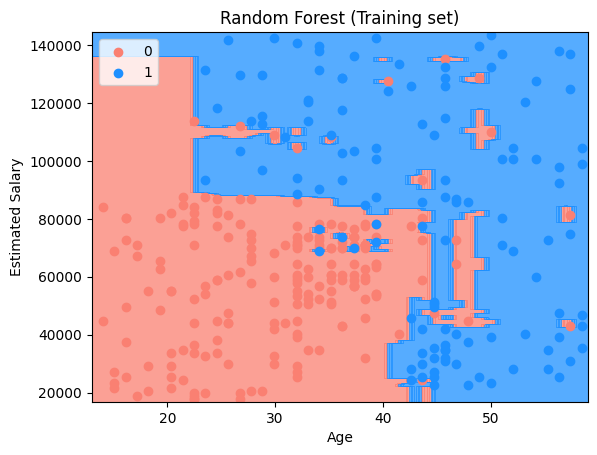

In [39]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=100)
)

predictions = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))
Z = predictions.reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(['#FA8072', '#1E90FF'])(i), label=j)

plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the test set results

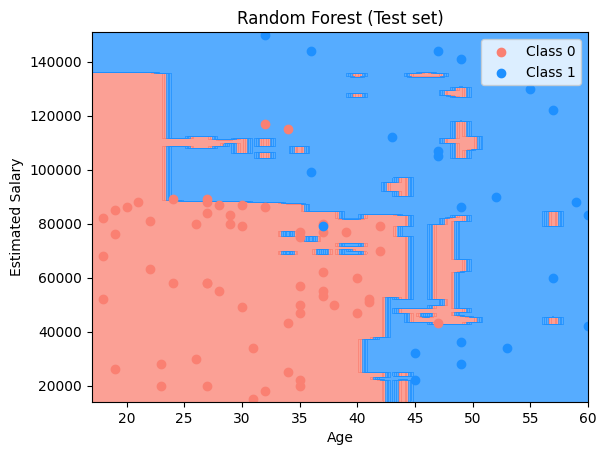

In [40]:
from matplotlib.colors import ListedColormap

# Inverse transform to original scale for plotting
X_set, y_set = sc.inverse_transform(X_test), y_test

# Create a grid of points with safer step sizes
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=100)
)

# Predict for each point on the grid using scaled coordinates
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the test set points
colors = ['#FA8072', '#1E90FF']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        color=colors[i],
        label=f'Class {j}'
    )

# Titles and labels
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()